In [1]:
import pandas as pd
import numpy as np

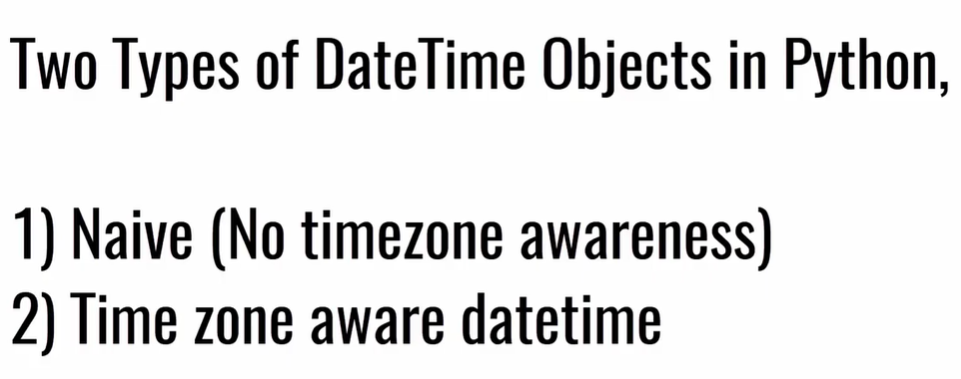

In [6]:
df = pd.read_csv('./Datasets/Csv/Microsoft.csv',skiprows=1, parse_dates=['Date Time'], index_col='Date Time')
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [8]:
# the dtype of index here is : datetime64[ns] , which is a 'Naive timeseries'

df.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

# .tz_localize ( )
- To convert a naive datafame to time zone aware dataframe/Series
- it folllows the UTC (Coordinated Universal Time Zone)
- Prior to 1972 it was called GMT (Greenwich mean time)

In [10]:
# since this belongs to NewY York, we will convert the timexone od datadrame to US/Eastern

# Here the index is datetime64[ns, US/Eastern] which is time zone aware.

df2 = df.tz_localize('US/Eastern')
df2.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

# .tz_convert( ) 
- to convert an existing time zone aware dataframe/series to a different place in UTC

In [11]:
# converting New York Timezoned df2 to Indian Calcutta Time zone

df3 = df2.tz_convert('Asia/Calcutta')
df3.index

DatetimeIndex(['2017-08-17 18:30:00+05:30', '2017-08-17 18:45:00+05:30',
               '2017-08-17 19:00:00+05:30', '2017-08-17 19:30:00+05:30',
               '2017-08-17 20:00:00+05:30', '2017-08-17 20:30:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', name='Date Time', freq=None)

# All time zone strings

In [12]:
from pytz import all_timezones

In [13]:
all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

# Arithmatic in Time Zones

In [25]:
# creating a dummy series

s = pd.Series(np.random.randint(0,15,10))
s.index = pd.date_range('2017-08-22 09:00:00',periods=10,freq='30min')
s

2017-08-22 09:00:00    11
2017-08-22 09:30:00    13
2017-08-22 10:00:00     4
2017-08-22 10:30:00    14
2017-08-22 11:00:00    10
2017-08-22 11:30:00     0
2017-08-22 12:00:00     6
2017-08-22 12:30:00     0
2017-08-22 13:00:00     6
2017-08-22 13:30:00    10
Freq: 30T, dtype: int32

In [26]:
# the index of series s is still naive
s.index 

DatetimeIndex(['2017-08-22 09:00:00', '2017-08-22 09:30:00',
               '2017-08-22 10:00:00', '2017-08-22 10:30:00',
               '2017-08-22 11:00:00', '2017-08-22 11:30:00',
               '2017-08-22 12:00:00', '2017-08-22 12:30:00',
               '2017-08-22 13:00:00', '2017-08-22 13:30:00'],
              dtype='datetime64[ns]', freq='30T')

In [27]:
# localizing the timezone of s to Europe/Berlin

b = s.tz_localize('Europe/Berlin')
b.index

DatetimeIndex(['2017-08-22 09:00:00+02:00', '2017-08-22 09:30:00+02:00',
               '2017-08-22 10:00:00+02:00', '2017-08-22 10:30:00+02:00',
               '2017-08-22 11:00:00+02:00', '2017-08-22 11:30:00+02:00',
               '2017-08-22 12:00:00+02:00', '2017-08-22 12:30:00+02:00',
               '2017-08-22 13:00:00+02:00', '2017-08-22 13:30:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq=None)

In [28]:
# localizing the timezone of s to Asia/Calcutta

c = s.tz_localize('Asia/Calcutta')
c.index

DatetimeIndex(['2017-08-22 09:00:00+05:30', '2017-08-22 09:30:00+05:30',
               '2017-08-22 10:00:00+05:30', '2017-08-22 10:30:00+05:30',
               '2017-08-22 11:00:00+05:30', '2017-08-22 11:30:00+05:30',
               '2017-08-22 12:00:00+05:30', '2017-08-22 12:30:00+05:30',
               '2017-08-22 13:00:00+05:30', '2017-08-22 13:30:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', freq=None)

In [29]:
b+c

2017-08-22 03:30:00+00:00     NaN
2017-08-22 04:00:00+00:00     NaN
2017-08-22 04:30:00+00:00     NaN
2017-08-22 05:00:00+00:00     NaN
2017-08-22 05:30:00+00:00     NaN
2017-08-22 06:00:00+00:00     NaN
2017-08-22 06:30:00+00:00     NaN
2017-08-22 07:00:00+00:00    11.0
2017-08-22 07:30:00+00:00    19.0
2017-08-22 08:00:00+00:00    14.0
2017-08-22 08:30:00+00:00     NaN
2017-08-22 09:00:00+00:00     NaN
2017-08-22 09:30:00+00:00     NaN
2017-08-22 10:00:00+00:00     NaN
2017-08-22 10:30:00+00:00     NaN
2017-08-22 11:00:00+00:00     NaN
2017-08-22 11:30:00+00:00     NaN
dtype: float64

- the thing that happens here : 
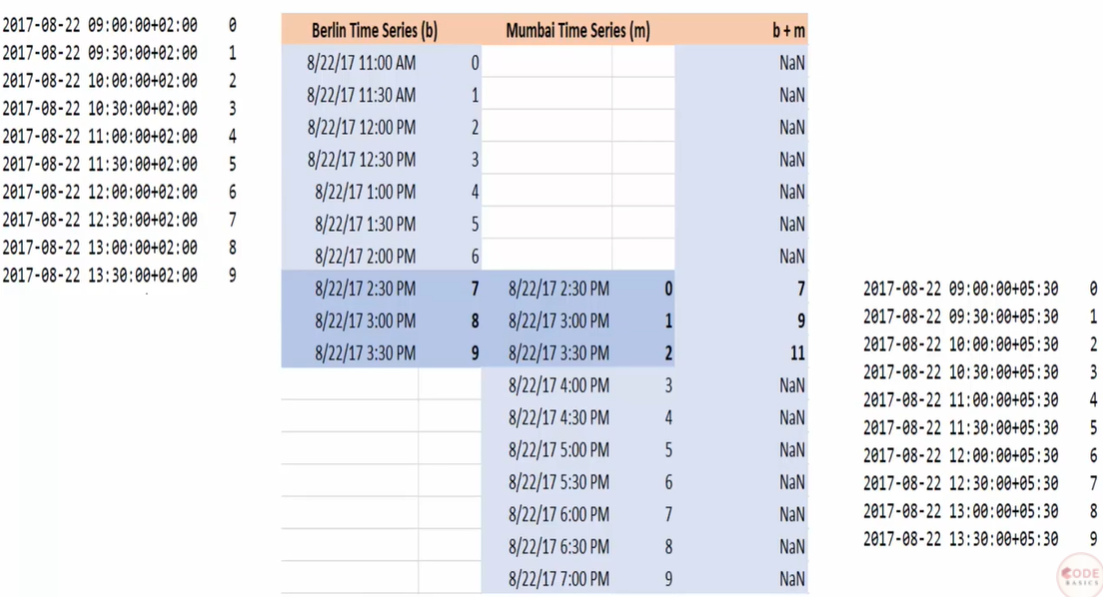